In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import shutil



In [2]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import tensorflow as tf

In [4]:
base_dir='C:\Data\screw_detection_data1'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [5]:
train_normal_dir=os.path.join(train_dir,'normal')
train_adnormal_dir=os.path.join(train_dir,'adnormal')
print(train_normal_dir,train_adnormal_dir)

C:\Data\screw_detection_data1\train\normal C:\Data\screw_detection_data1\train\adnormal


In [6]:
validation_normal_dir=os.path.join(validation_dir,'normal')
validation_adnormal_dir=os.path.join(validation_dir,'adnormal')
print(validation_normal_dir,validation_adnormal_dir)

C:\Data\screw_detection_data1\validation\normal C:\Data\screw_detection_data1\validation\adnormal


In [7]:
test_normal_dir=os.path.join(test_dir,'normal')
test_adnormal_dir=os.path.join(test_dir,'adnormal')
print(test_normal_dir,test_adnormal_dir)

C:\Data\screw_detection_data1\test\normal C:\Data\screw_detection_data1\test\adnormal


In [8]:
train_normal_fnames=os.listdir(train_normal_dir)
train_adnormal_fnames=os.listdir(train_adnormal_dir)
print(train_normal_fnames)
print(train_adnormal_fnames)


['KakaoTalk_20220729_083638256_08.jpg', 'KakaoTalk_20220729_083638256_09.jpg', 'KakaoTalk_20220802_145959016_01.jpg', 'KakaoTalk_20220802_145959016_02.jpg', 'KakaoTalk_20220802_145959016_03.jpg', 'KakaoTalk_20220802_145959016_07.jpg', 'KakaoTalk_20220802_145959016_09.jpg', 'KakaoTalk_20220802_150548275_08.jpg', 'KakaoTalk_20220802_150548275_09.jpg', 'KakaoTalk_20220802_150548275_10.jpg', 'KakaoTalk_20220802_150548275_11.jpg', 'KakaoTalk_20220802_150548275_12.jpg', 'KakaoTalk_20220802_150548275_13.jpg', 'KakaoTalk_20220802_150548275_14.jpg', 'KakaoTalk_20220802_150548275_15.jpg', 'KakaoTalk_20220803_151008872.jpg', 'KakaoTalk_20220803_151008872_01.jpg', 'KakaoTalk_20220803_151008872_04.jpg', 'KakaoTalk_20220803_151008872_05.jpg', 'KakaoTalk_20220803_151008872_06.jpg', 'KakaoTalk_20220803_151008872_09.jpg', 'KakaoTalk_20220803_151008872_10.jpg', 'KakaoTalk_20220803_151008872_12.jpg', 'KakaoTalk_20220803_151008872_13.jpg', 'KakaoTalk_20220803_151049850_01.jpg', 'KakaoTalk_20220803_1510498

In [9]:
print('Total training normal images :',len(os.listdir(train_normal_dir)))
print('Total training adnormal images :',len(os.listdir(train_adnormal_dir)))

print('Total validation normal images :',len(os.listdir(validation_normal_dir)))
print('Total validation adnormal images :',len(os.listdir(validation_adnormal_dir)))

print('Total test normal images :',len(os.listdir(test_normal_dir)))
print('Total test adnormal images :',len(os.listdir(test_adnormal_dir)))

Total training normal images : 40
Total training adnormal images : 40
Total validation normal images : 10
Total validation adnormal images : 10
Total test normal images : 10
Total test adnormal images : 10


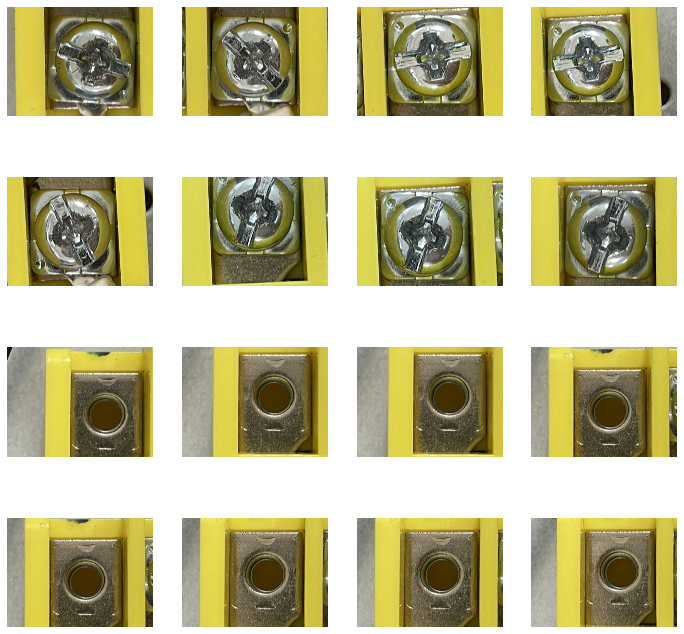

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows,ncols=4,4
pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*3,nrows*3)


pic_index+=8

next_normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
next_adnormal_pix=[os.path.join(train_adnormal_dir,fname) for fname in train_adnormal_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_normal_pix+next_adnormal_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('OFF')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=25,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest'
                                 )



validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(128,128))

validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                            batch_size=4,
                                                            color_mode='grayscale',
                                                            class_mode='binary',
                                                            target_size=(128,128))




test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=4,
                                                color_mode='grayscale',
                                                class_mode='binary',
                                                target_size=(128,128))

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'adnormal': 0, 'normal': 1}

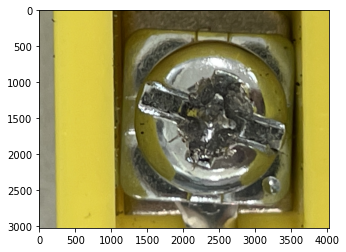

In [14]:
sample_img=mpimg.imread(next_normal_pix[0])
plt.imshow(sample_img)
plt.show()

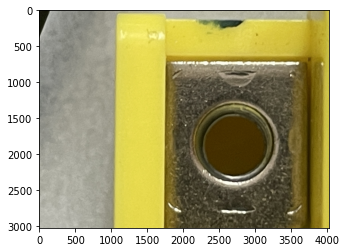

In [15]:
sample_img=mpimg.imread(next_adnormal_pix[0])
plt.imshow(sample_img)
plt.show()

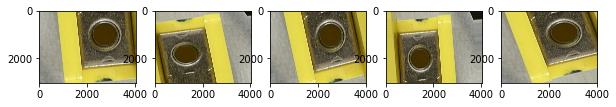

In [16]:
max_iter=5
cnt=1
sample_img2=sample_img[np.newaxis, ...]


plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1,max_iter,cnt)
    plt.imshow(image.array_to_img(img[0]))
    
    if cnt == max_iter:
        break
    cnt+=1

In [17]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(4,4),activation='relu',input_shape=(128,128,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(32,(4,4),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 16)      272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
import math
import time
from datetime import timedelta

In [20]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14283076656548845896
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9927917568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9481797098910769920
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [21]:

start=time.process_time()

history=model.fit(train_generator,
                  validation_data=validation_generator,
                  steps_per_epoch=4,
                  epochs=50,
                  validation_steps=4,
                  verbose=2)

end=time.process_time()

Epoch 1/50
4/4 - 5s - loss: 0.9595 - accuracy: 0.4844 - val_loss: 0.6993 - val_accuracy: 0.5000 - 5s/epoch - 1s/step
Epoch 2/50
4/4 - 4s - loss: 0.6985 - accuracy: 0.4688 - val_loss: 0.6755 - val_accuracy: 0.7500 - 4s/epoch - 888ms/step
Epoch 3/50
4/4 - 4s - loss: 0.7037 - accuracy: 0.5625 - val_loss: 0.6767 - val_accuracy: 0.6250 - 4s/epoch - 890ms/step
Epoch 4/50
4/4 - 4s - loss: 0.7029 - accuracy: 0.6094 - val_loss: 0.6647 - val_accuracy: 0.7500 - 4s/epoch - 894ms/step
Epoch 5/50
4/4 - 4s - loss: 0.6682 - accuracy: 0.5781 - val_loss: 0.6026 - val_accuracy: 0.7500 - 4s/epoch - 891ms/step
Epoch 6/50
4/4 - 4s - loss: 0.6258 - accuracy: 0.6719 - val_loss: 0.8183 - val_accuracy: 0.5000 - 4s/epoch - 905ms/step
Epoch 7/50
4/4 - 4s - loss: 0.6788 - accuracy: 0.6719 - val_loss: 0.5668 - val_accuracy: 0.8750 - 4s/epoch - 880ms/step
Epoch 8/50
4/4 - 4s - loss: 0.5125 - accuracy: 0.8281 - val_loss: 0.8510 - val_accuracy: 0.5625 - 4s/epoch - 879ms/step
Epoch 9/50
4/4 - 3s - loss: 0.8257 - accura

KeyboardInterrupt: 

: 

In [ ]:
print("Time elapsed: ", timedelta(seconds=end-start))


Time elapsed:  0:03:45.609375


In [ ]:
score=model.evaluate(train_generator)
print("accuracy=",score[1])
print("loss=",score[0])

5/5 [==============================] - 4s 830ms/step - loss: 0.0015 - accuracy: 1.0000
accuracy= 1.0
loss= 0.0014734410215169191


In [ ]:

score2=model.evaluate(validation_generator)
print("accuracy=",score2[1])
print("loss=",score2[0])

5/5 [==============================] - 1s 165ms/step - loss: 4.2181e-05 - accuracy: 1.0000
accuracy= 1.0
loss= 4.218108006170951e-05


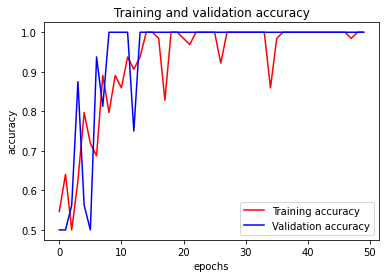

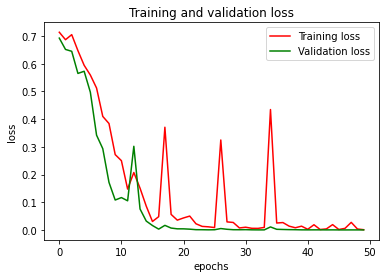

In [ ]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:

start = time.process_time()
score2=model.evaluate(test_generator)
print("accuracy=",score2[1])
print("loss=",score2[0])

end = time.process_time()

5/5 [==============================] - 1s 168ms/step - loss: 1.9386e-05 - accuracy: 1.0000
accuracy= 1.0
loss= 1.9385895939194597e-05


In [ ]:
print("Time elapsed: ", timedelta(seconds=end-start))


Time elapsed:  0:00:01.062500
